# Saint Eynard - Refuge du Gouter

> Note: The Free Space Path Loss is 123.95 dB at 868 MHz for 109 Kms

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
frames = pd.read_csv('../logs/d1d1e80000000033_refugegouter.csv.gz',sep=';',decimal=',',index_col='Sequence')

In [8]:
# convert the datetime column to a pandas datetime object
frames['Date_Time'] = pd.to_datetime(frames['Date_Time'])

# convert the datetime column to an integer
frames['timestamp'] = frames['Date_Time'].astype(int)

# divide the resulting integer by the number of nanoseconds in a second
frames['timestamp'] = frames['timestamp'].div(10**9)

frames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5763 entries, 1152 to 15137
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date_Time  5763 non-null   datetime64[ns]
 1   Gateway    5763 non-null   object        
 2   Direction  5763 non-null   object        
 3   Type       5763 non-null   object        
 4   DevAddr    5763 non-null   object        
 5   DevEUI     5763 non-null   object        
 6   Timestamp  5763 non-null   int64         
 7   Port       5763 non-null   int64         
 8   SF         5763 non-null   int64         
 9   RSSI       5763 non-null   int64         
 10  SNR        5763 non-null   float64       
 11  timestamp  5763 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 585.3+ KB


In [9]:
frames

,Date_Time,Gateway,Direction,Type,DevAddr,DevEUI,Timestamp,Port,SF,RSSI,SNR,timestamp
Sequence,,,,,,,,,,,,
1152,2023-06-23 12:11:00,Refuge du Gouter v2,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,370621443,3,7,-116,-3.5,1.687522e+09
1153,2023-06-23 12:22:00,Refuge du Gouter v2,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,974696083,3,7,-113,-6.8,1.687523e+09
1153,2023-06-23 12:22:00,Refuge du Gouter v2,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,980716932,3,7,-115,-6.5,1.687523e+09
1154,2023-06-23 12:32:00,Refuge du Gouter v2,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,1584720732,3,7,-115,-5.2,1.687524e+09
1155,2023-06-23 12:42:00,Refuge du Gouter v2,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,2188519883,3,7,-116,-5.8,1.687524e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
15114,2023-09-29 02:47:00,Refuge du Gouter v2,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,3879523579,3,7,-116,-6.8,1.695956e+09
15117,2023-09-29 03:17:00,Refuge du Gouter v2,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,1396535523,3,7,-117,-6.0,1.695957e+09
15120,2023-09-29 03:48:00,Refuge du Gouter v2,up,UNCONF_DATA_UP,FC00AF46,d1d1e80000000033,3207196052,3,7,-116,-8.5,1.695959e+09


## SNR & RSSI & PER

In [18]:
PER =  (1 - len(frames)/(15137+1-1152));
PER

0.5879450879450879

In [19]:
frames[["RSSI", "SNR"]].describe()

,RSSI,SNR
count,5763.000000,5763.000000
mean,-115.052056,-5.256203
std,1.927729,1.521566
min,-119.000000,-10.500000
25%,-116.000000,-6.200000
50%,-116.000000,-5.200000
75%,-114.000000,-4.200000
max,-99.000000,0.800000


In [20]:
rssi = frames["RSSI"]
snr = frames["SNR"]
#fCnt = frames["Sequence"]

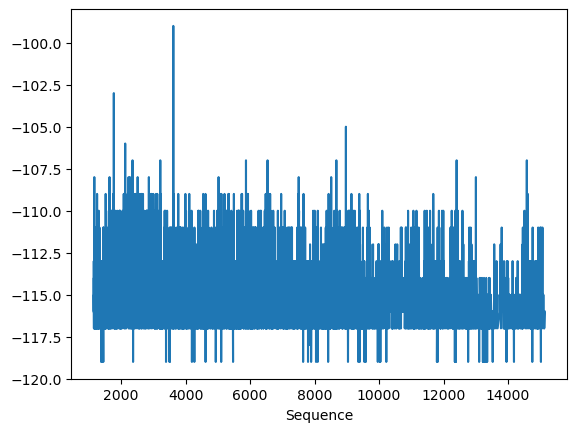

In [21]:
rssi.plot()
plt.show()

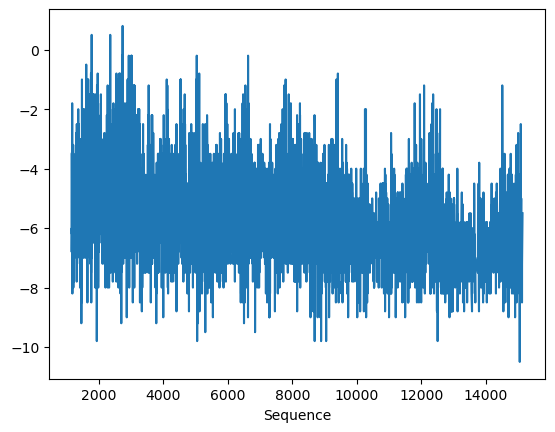

In [22]:
snr.plot()
plt.show()

In [23]:
#fCnt.plot()
#plt.show()

## TODO
* [ ] add ESP
* [ ] compute PER

## References
* [Predicting LoRaWAN Capacity](https://lora-developers.semtech.com/documentation/tech-papers-and-guides/predicting-lorawan-capacity/)

In [24]:
# Table 1: Data Rates and Required Signal-to-Noise Ratios in [Predicting LoRaWAN Capacity](https://lora-developers.semtech.com/documentation/tech-papers-and-guides/predicting-lorawan-capacity/)
required_snr = pd.DataFrame(data={ \
    'sf': [5, 6, 7, 8, 9, 10, 11, 12], \
    'snr': [-2.5, -5, -7.5, -10, -12.5, -15, 17.5, -20]})
required_snr

,sf,snr
0,5,-2.5
1,6,-5.0
2,7,-7.5
3,8,-10.0
4,9,-12.5
5,10,-15.0
6,11,17.5
7,12,-20.0
